In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, auc

In [2]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

In [3]:
# Load and separate datasets
with open('week4.csv', 'r') as f:
    lines = f.readlines()

In [4]:
dataset1_lines = []
dataset2_lines = []
current_dataset = 0

In [5]:
for line in lines:
    if line.startswith('#'):
        current_dataset += 1
        continue
    if current_dataset == 1:
        dataset1_lines.append(line.strip())
    elif current_dataset == 2:
        dataset2_lines.append(line.strip())

In [6]:
data1 = []
for line in dataset1_lines:
    if line:
        data1.append([float(x) for x in line.split(',')])
data1 = np.array(data1)

In [7]:
data2 = []
for line in dataset2_lines:
    if line:
        data2.append([float(x) for x in line.split(',')])
data2 = np.array(data2)

In [8]:
X1 = data1[:, :2]
y1 = data1[:, 2]

In [9]:
X2 = data2[:, :2]
y2 = data2[:, 2]

In [10]:
print('Dataset 1:', X1.shape, y1.shape)
print('Dataset 2:', X2.shape, y2.shape)
print('Dataset 1 class distribution:', np.unique(y1, return_counts=True))
print('Dataset 2 class distribution:', np.unique(y2, return_counts=True))

Dataset 1: (1585, 2) (1585,)
Dataset 2: (1079, 2) (1079,)
Dataset 1 class distribution: (array([-1.,  1.]), array([ 528, 1057]))
Dataset 2 class distribution: (array([-1.,  1.]), array([804, 275]))


==================== DATASET 1 ====================

In [11]:
print('\n' + '='*50)
print('DATASET 1')
print('='*50 + '\n')


DATASET 1



(i)(a) Logistic Regression with polynomial features

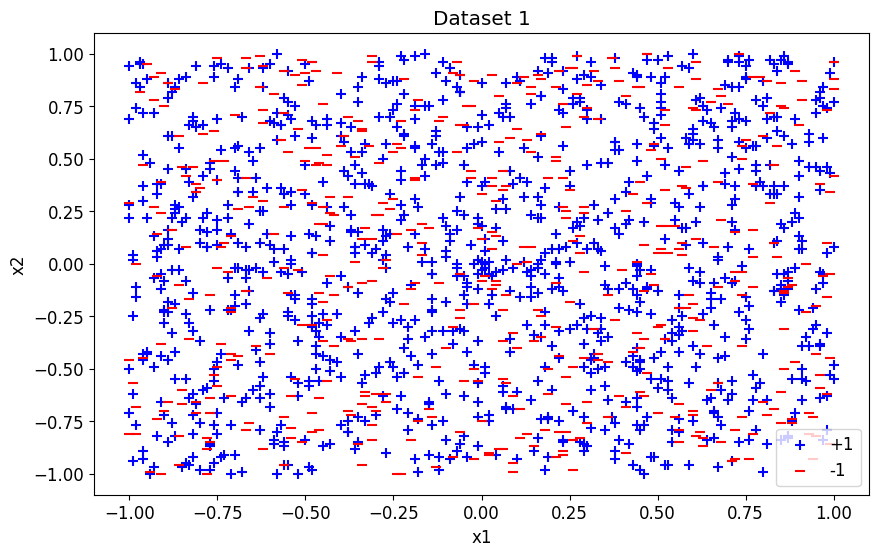

In [12]:
plt.scatter(X1[y1 == 1, 0], X1[y1 == 1, 1], c='blue', marker='+', s=50, label='+1')
plt.scatter(X1[y1 == -1, 0], X1[y1 == -1, 1], c='red', marker='_', s=50, label='-1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Dataset 1')
plt.legend()
plt.savefig('figures/dataset1_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

In [13]:
q_range = [1, 2, 3, 4, 5]
C_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [14]:
best_f1 = 0
best_q = 1
best_C = 1

In [15]:
f1_results = np.zeros((len(q_range), len(C_range)))
f1_stds = np.zeros((len(q_range), len(C_range)))

In [16]:
print('Running cross-validation for Logistic Regression...')
for i, q in enumerate(q_range):
    poly = PolynomialFeatures(degree=q, include_bias=True)
    X1_poly = poly.fit_transform(X1)
    
    for j, C in enumerate(C_range):
        f1_scores = []
        for train_idx, val_idx in kf.split(X1_poly):
            model = LogisticRegression(penalty='l2', C=C, solver='lbfgs', max_iter=1000)
            model.fit(X1_poly[train_idx], y1[train_idx])
            pred = model.predict(X1_poly[val_idx])
            f1_scores.append(f1_score(y1[val_idx], pred))
        
        mean_f1 = np.mean(f1_scores)
        std_f1 = np.std(f1_scores)
        f1_results[i, j] = mean_f1
        f1_stds[i, j] = std_f1
        
        if mean_f1 > best_f1:
            best_f1 = mean_f1
            best_q = q
            best_C = C

Running cross-validation for Logistic Regression...


/Users/sayanide/Documents/Assignments/Machine Learning/.venv/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/sayanide/Documents/Assignments/Machine Learning/.venv/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/sayanide/Documents/Assignments/Machine Learning/.venv/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/sayanide/Documents/Assignments/Machine Learning/.venv/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/sayanide/Documents/Assignments/Machine Learning/.venv/lib/python3.11/site-packages/sklea

In [17]:
print(f'\nBest q: {best_q}, Best C: {best_C}, Best F1: {best_f1:.4f}')


Best q: 1, Best C: 0.001, Best F1: 0.8000


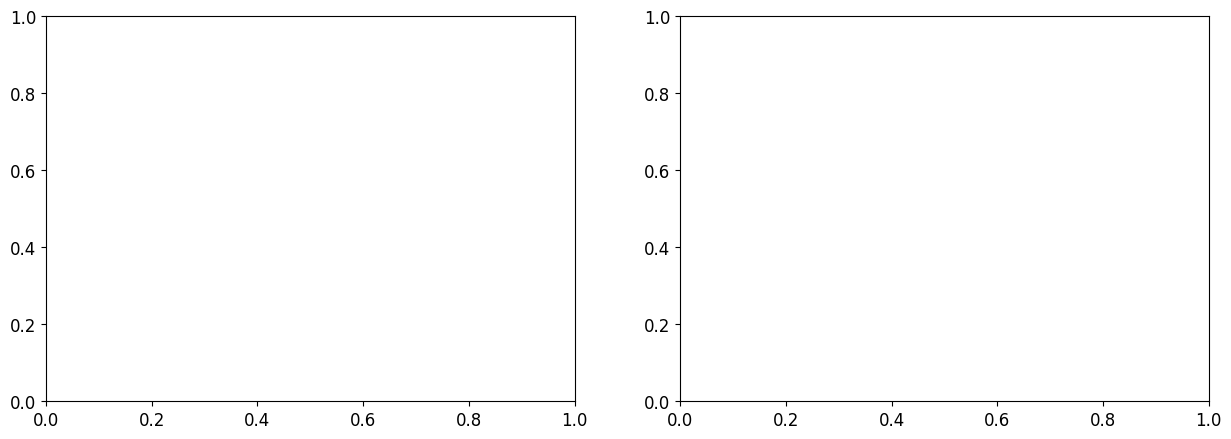

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

In [19]:
for i, q in enumerate(q_range):
    axes[0].errorbar(C_range, f1_results[i, :], yerr=f1_stds[i, :], 
                     marker='o', capsize=5, label=f'q={q}')
axes[0].set_xscale('log')
axes[0].set_xlabel('C')
axes[0].set_ylabel('F1 Score')
axes[0].set_title('CV F1 Score vs C (Dataset 1 Logistic Regression)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

In [20]:
for j, C in enumerate(C_range):
    axes[1].errorbar(q_range, f1_results[:, j], yerr=f1_stds[:, j], 
                     marker='o', capsize=5, label=f'C={C}')
axes[1].set_xlabel('Polynomial degree q')
axes[1].set_ylabel('F1 Score')
axes[1].set_title('CV F1 Score vs q (Dataset 1 Logistic Regression)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

In [21]:
plt.tight_layout()
plt.savefig('figures/dataset1_logistic_cv.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1000x600 with 0 Axes>

In [22]:
poly_best = PolynomialFeatures(degree=best_q, include_bias=True)
X1_poly_best = poly_best.fit_transform(X1)
log_reg1 = LogisticRegression(penalty='l2', C=best_C, solver='lbfgs', max_iter=1000)
log_reg1.fit(X1_poly_best, y1)

/Users/sayanide/Documents/Assignments/Machine Learning/.venv/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/sayanide/Documents/Assignments/Machine Learning/.venv/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/sayanide/Documents/Assignments/Machine Learning/.venv/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept


LogisticRegression(C=0.001, max_iter=1000)

In [23]:
x1_min, x1_max = X1[:, 0].min() - 0.5, X1[:, 0].max() + 0.5
x2_min, x2_max = X1[:, 1].min() - 0.5, X1[:, 1].max() + 0.5
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 200),
                        np.linspace(x2_min, x2_max, 200))
X_grid = np.c_[xx1.ravel(), xx2.ravel()]
X_grid_poly = poly_best.transform(X_grid)
Z = log_reg1.predict(X_grid_poly).reshape(xx1.shape)

/Users/sayanide/Documents/Assignments/Machine Learning/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/sayanide/Documents/Assignments/Machine Learning/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/sayanide/Documents/Assignments/Machine Learning/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


/var/folders/ym/s886qqvn3jl89r5cz312hmmw0000gn/T/ipykernel_48238/1050471464.py:2: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X1[y1 == 1, 0], X1[y1 == 1, 1], c='blue', marker='+', s=50, label='+1', edgecolors='k')
/var/folders/ym/s886qqvn3jl89r5cz312hmmw0000gn/T/ipykernel_48238/1050471464.py:3: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X1[y1 == -1, 0], X1[y1 == -1, 1], c='red', marker='_', s=50, label='-1', edgecolors='k')


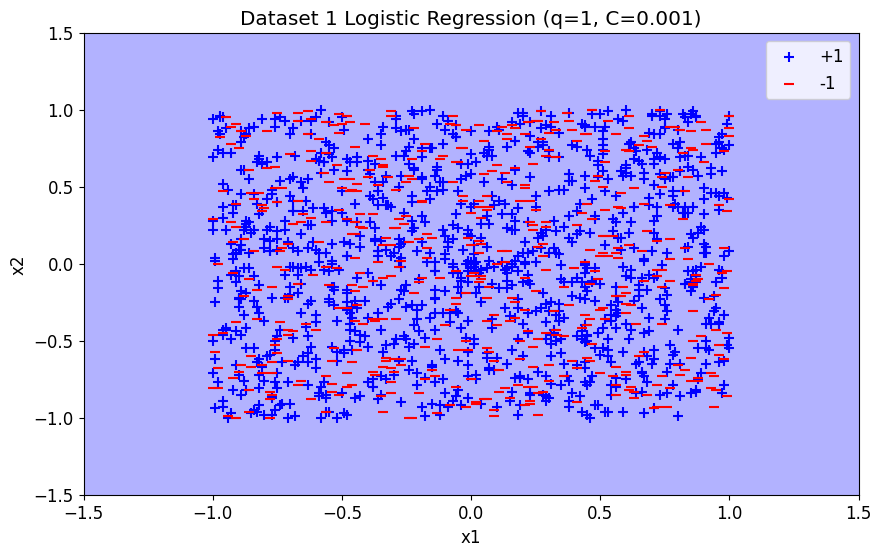

In [24]:
plt.contourf(xx1, xx2, Z, alpha=0.3, levels=[-1.5, 0, 1.5], colors=['red', 'blue'])
plt.scatter(X1[y1 == 1, 0], X1[y1 == 1, 1], c='blue', marker='+', s=50, label='+1', edgecolors='k')
plt.scatter(X1[y1 == -1, 0], X1[y1 == -1, 1], c='red', marker='_', s=50, label='-1', edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(f'Dataset 1 Logistic Regression (q={best_q}, C={best_C})')
plt.legend()
plt.savefig('figures/dataset1_logistic_boundary.png', dpi=300, bbox_inches='tight')
plt.show()

In [25]:
print(f'\nPolynomial degree: {best_q}')
print(f'Number of features: {X1_poly_best.shape[1]}')


Polynomial degree: 1
Number of features: 3


(i)(b) kNN Classifier

In [26]:
k_range = [1, 3, 5, 7, 9, 11, 15, 21, 31, 41, 51]
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [27]:
f1_means = []
f1_stds = []

In [28]:
print('\nRunning cross-validation for kNN...')
for k in k_range:
    f1_scores = []
    for train_idx, val_idx in kf.split(X1):
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X1[train_idx], y1[train_idx])
        pred = model.predict(X1[val_idx])
        f1_scores.append(f1_score(y1[val_idx], pred))
    
    f1_means.append(np.mean(f1_scores))
    f1_stds.append(np.std(f1_scores))


Running cross-validation for kNN...


In [29]:
best_k_idx = np.argmax(f1_means)
best_k1 = k_range[best_k_idx]

In [30]:
print(f'\nBest k: {best_k1}, Best F1: {f1_means[best_k_idx]:.4f}')


Best k: 51, Best F1: 0.8000


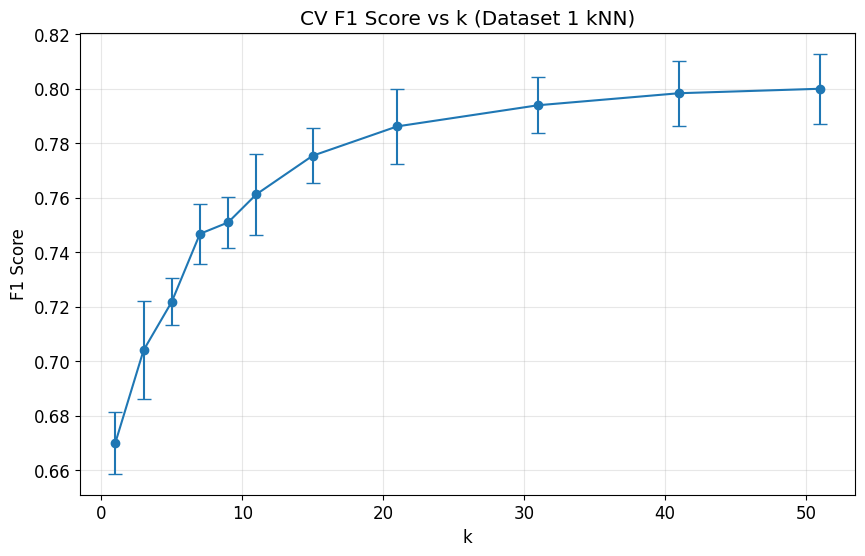

In [31]:
plt.errorbar(k_range, f1_means, yerr=f1_stds, marker='o', capsize=5)
plt.xlabel('k')
plt.ylabel('F1 Score')
plt.title('CV F1 Score vs k (Dataset 1 kNN)')
plt.grid(True, alpha=0.3)
plt.savefig('figures/dataset1_knn_cv.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=best_k1)
knn1.fit(X1, y1)

In [ ]:
Z_knn = knn1.predict(X_grid).reshape(xx1.shape)

In [ ]:
plt.contourf(xx1, xx2, Z_knn, alpha=0.3, levels=[-1.5, 0, 1.5], colors=['red', 'blue'])
plt.scatter(X1[y1 == 1, 0], X1[y1 == 1, 1], c='blue', marker='+', s=50, label='+1', edgecolors='k')
plt.scatter(X1[y1 == -1, 0], X1[y1 == -1, 1], c='red', marker='_', s=50, label='-1', edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(f'Dataset 1 kNN (k={best_k1})')
plt.legend()
plt.savefig('figures/dataset1_knn_boundary.png', dpi=300, bbox_inches='tight')
plt.show()

(i)(c) Confusion Matrices

In [ ]:
y_pred_log1 = log_reg1.predict(X1_poly_best)
y_pred_knn1 = knn1.predict(X1)

In [ ]:
dummy_freq = DummyClassifier(strategy='most_frequent')
dummy_freq.fit(X1, y1)
y_pred_dummy_freq = dummy_freq.predict(X1)

In [ ]:
dummy_uniform = DummyClassifier(strategy='uniform', random_state=42)
dummy_uniform.fit(X1, y1)
y_pred_dummy_uniform = dummy_uniform.predict(X1)

In [ ]:
cm_log1 = confusion_matrix(y1, y_pred_log1, labels=[-1, 1])
cm_knn1 = confusion_matrix(y1, y_pred_knn1, labels=[-1, 1])
cm_dummy_freq = confusion_matrix(y1, y_pred_dummy_freq, labels=[-1, 1])
cm_dummy_uniform = confusion_matrix(y1, y_pred_dummy_uniform, labels=[-1, 1])

In [ ]:
print('\nLogistic Regression Confusion Matrix:')
print(cm_log1)
print(f'Accuracy: {(cm_log1[0,0] + cm_log1[1,1]) / cm_log1.sum():.4f}')
print(f'True Positive Rate: {cm_log1[1,1] / (cm_log1[1,0] + cm_log1[1,1]):.4f}')
print(f'False Positive Rate: {cm_log1[0,1] / (cm_log1[0,0] + cm_log1[0,1]):.4f}')
print(f'Precision: {cm_log1[1,1] / (cm_log1[0,1] + cm_log1[1,1]):.4f}')

In [ ]:
print('\nkNN Confusion Matrix:')
print(cm_knn1)
print(f'Accuracy: {(cm_knn1[0,0] + cm_knn1[1,1]) / cm_knn1.sum():.4f}')
print(f'True Positive Rate: {cm_knn1[1,1] / (cm_knn1[1,0] + cm_knn1[1,1]):.4f}')
print(f'False Positive Rate: {cm_knn1[0,1] / (cm_knn1[0,0] + cm_knn1[0,1]):.4f}')
print(f'Precision: {cm_knn1[1,1] / (cm_knn1[0,1] + cm_knn1[1,1]):.4f}')

In [ ]:
print('\nBaseline (Most Frequent) Confusion Matrix:')
print(cm_dummy_freq)
print(f'Accuracy: {(cm_dummy_freq[0,0] + cm_dummy_freq[1,1]) / cm_dummy_freq.sum():.4f}')

In [ ]:
print('\nBaseline (Random) Confusion Matrix:')
print(cm_dummy_uniform)
print(f'Accuracy: {(cm_dummy_uniform[0,0] + cm_dummy_uniform[1,1]) / cm_dummy_uniform.sum():.4f}')

(i)(d) ROC Curves

In [ ]:
y_score_log1 = log_reg1.decision_function(X1_poly_best)
y_score_knn1 = knn1.predict_proba(X1)[:, 1]

In [ ]:
fpr_log1, tpr_log1, _ = roc_curve(y1, y_score_log1)
auc_log1 = auc(fpr_log1, tpr_log1)

In [ ]:
fpr_knn1, tpr_knn1, _ = roc_curve(y1, y_score_knn1)
auc_knn1 = auc(fpr_knn1, tpr_knn1)

In [ ]:
tp_rate_freq = cm_dummy_freq[1,1] / (cm_dummy_freq[1,0] + cm_dummy_freq[1,1])
fp_rate_freq = cm_dummy_freq[0,1] / (cm_dummy_freq[0,0] + cm_dummy_freq[0,1])

In [ ]:
tp_rate_uniform = cm_dummy_uniform[1,1] / (cm_dummy_uniform[1,0] + cm_dummy_uniform[1,1])
fp_rate_uniform = cm_dummy_uniform[0,1] / (cm_dummy_uniform[0,0] + cm_dummy_uniform[0,1])

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(fpr_log1, tpr_log1, linewidth=2, label=f'Logistic Regression (AUC={auc_log1:.4f})')
plt.plot(fpr_knn1, tpr_knn1, linewidth=2, label=f'kNN (AUC={auc_knn1:.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
plt.scatter([fp_rate_freq], [tp_rate_freq], s=100, c='orange', marker='o', label='Baseline (Most Frequent)', zorder=5)
plt.scatter([fp_rate_uniform], [tp_rate_uniform], s=100, c='green', marker='s', label='Baseline (Random)', zorder=5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (Dataset 1)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('figures/dataset1_roc.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
print(f'\nLogistic Regression AUC: {auc_log1:.4f}')
print(f'kNN AUC: {auc_knn1:.4f}')

==================== DATASET 2 ====================

In [ ]:
print('\n' + '='*50)
print('DATASET 2')
print('='*50 + '\n')

(ii)(a) Logistic Regression with polynomial features

In [ ]:
plt.scatter(X2[y2 == 1, 0], X2[y2 == 1, 1], c='blue', marker='+', s=50, label='+1')
plt.scatter(X2[y2 == -1, 0], X2[y2 == -1, 1], c='red', marker='_', s=50, label='-1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Dataset 2')
plt.legend()
plt.savefig('figures/dataset2_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
q_range = [1, 2, 3, 4, 5]
C_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
best_f1 = 0
best_q = 1
best_C = 1

In [ ]:
f1_results = np.zeros((len(q_range), len(C_range)))
f1_stds = np.zeros((len(q_range), len(C_range)))

In [ ]:
print('Running cross-validation for Logistic Regression...')
for i, q in enumerate(q_range):
    poly = PolynomialFeatures(degree=q, include_bias=True)
    X2_poly = poly.fit_transform(X2)
    
    for j, C in enumerate(C_range):
        f1_scores = []
        for train_idx, val_idx in kf.split(X2_poly):
            model = LogisticRegression(penalty='l2', C=C, solver='lbfgs', max_iter=1000)
            model.fit(X2_poly[train_idx], y2[train_idx])
            pred = model.predict(X2_poly[val_idx])
            f1_scores.append(f1_score(y2[val_idx], pred))
        
        mean_f1 = np.mean(f1_scores)
        std_f1 = np.std(f1_scores)
        f1_results[i, j] = mean_f1
        f1_stds[i, j] = std_f1
        
        if mean_f1 > best_f1:
            best_f1 = mean_f1
            best_q = q
            best_C = C

In [ ]:
print(f'\nBest q: {best_q}, Best C: {best_C}, Best F1: {best_f1:.4f}')

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

In [ ]:
for i, q in enumerate(q_range):
    axes[0].errorbar(C_range, f1_results[i, :], yerr=f1_stds[i, :], 
                     marker='o', capsize=5, label=f'q={q}')
axes[0].set_xscale('log')
axes[0].set_xlabel('C')
axes[0].set_ylabel('F1 Score')
axes[0].set_title('CV F1 Score vs C (Dataset 2 Logistic Regression)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

In [ ]:
for j, C in enumerate(C_range):
    axes[1].errorbar(q_range, f1_results[:, j], yerr=f1_stds[:, j], 
                     marker='o', capsize=5, label=f'C={C}')
axes[1].set_xlabel('Polynomial degree q')
axes[1].set_ylabel('F1 Score')
axes[1].set_title('CV F1 Score vs q (Dataset 2 Logistic Regression)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

In [ ]:
plt.tight_layout()
plt.savefig('figures/dataset2_logistic_cv.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
poly_best2 = PolynomialFeatures(degree=best_q, include_bias=True)
X2_poly_best = poly_best2.fit_transform(X2)
log_reg2 = LogisticRegression(penalty='l2', C=best_C, solver='lbfgs', max_iter=1000)
log_reg2.fit(X2_poly_best, y2)

In [ ]:
x1_min, x1_max = X2[:, 0].min() - 0.5, X2[:, 0].max() + 0.5
x2_min, x2_max = X2[:, 1].min() - 0.5, X2[:, 1].max() + 0.5
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 200),
                        np.linspace(x2_min, x2_max, 200))
X_grid = np.c_[xx1.ravel(), xx2.ravel()]
X_grid_poly = poly_best2.transform(X_grid)
Z = log_reg2.predict(X_grid_poly).reshape(xx1.shape)

In [ ]:
plt.contourf(xx1, xx2, Z, alpha=0.3, levels=[-1.5, 0, 1.5], colors=['red', 'blue'])
plt.scatter(X2[y2 == 1, 0], X2[y2 == 1, 1], c='blue', marker='+', s=50, label='+1', edgecolors='k')
plt.scatter(X2[y2 == -1, 0], X2[y2 == -1, 1], c='red', marker='_', s=50, label='-1', edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(f'Dataset 2 Logistic Regression (q={best_q}, C={best_C})')
plt.legend()
plt.savefig('figures/dataset2_logistic_boundary.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
print(f'\nPolynomial degree: {best_q}')
print(f'Number of features: {X2_poly_best.shape[1]}')

(ii)(b) kNN Classifier

In [ ]:
k_range = [1, 3, 5, 7, 9, 11, 15, 21, 31, 41, 51]
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
f1_means = []
f1_stds = []

In [ ]:
print('\nRunning cross-validation for kNN...')
for k in k_range:
    f1_scores = []
    for train_idx, val_idx in kf.split(X2):
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X2[train_idx], y2[train_idx])
        pred = model.predict(X2[val_idx])
        f1_scores.append(f1_score(y2[val_idx], pred))
    
    f1_means.append(np.mean(f1_scores))
    f1_stds.append(np.std(f1_scores))

In [ ]:
best_k_idx = np.argmax(f1_means)
best_k2 = k_range[best_k_idx]

In [ ]:
print(f'\nBest k: {best_k2}, Best F1: {f1_means[best_k_idx]:.4f}')

In [ ]:
plt.errorbar(k_range, f1_means, yerr=f1_stds, marker='o', capsize=5)
plt.xlabel('k')
plt.ylabel('F1 Score')
plt.title('CV F1 Score vs k (Dataset 2 kNN)')
plt.grid(True, alpha=0.3)
plt.savefig('figures/dataset2_knn_cv.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=best_k2)
knn2.fit(X2, y2)

In [ ]:
Z_knn = knn2.predict(X_grid).reshape(xx1.shape)

In [ ]:
plt.contourf(xx1, xx2, Z_knn, alpha=0.3, levels=[-1.5, 0, 1.5], colors=['red', 'blue'])
plt.scatter(X2[y2 == 1, 0], X2[y2 == 1, 1], c='blue', marker='+', s=50, label='+1', edgecolors='k')
plt.scatter(X2[y2 == -1, 0], X2[y2 == -1, 1], c='red', marker='_', s=50, label='-1', edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(f'Dataset 2 kNN (k={best_k2})')
plt.legend()
plt.savefig('figures/dataset2_knn_boundary.png', dpi=300, bbox_inches='tight')
plt.show()

(ii)(c) Confusion Matrices

In [ ]:
y_pred_log2 = log_reg2.predict(X2_poly_best)
y_pred_knn2 = knn2.predict(X2)

In [ ]:
dummy_freq2 = DummyClassifier(strategy='most_frequent')
dummy_freq2.fit(X2, y2)
y_pred_dummy_freq2 = dummy_freq2.predict(X2)

In [ ]:
dummy_uniform2 = DummyClassifier(strategy='uniform', random_state=42)
dummy_uniform2.fit(X2, y2)
y_pred_dummy_uniform2 = dummy_uniform2.predict(X2)

In [ ]:
cm_log2 = confusion_matrix(y2, y_pred_log2, labels=[-1, 1])
cm_knn2 = confusion_matrix(y2, y_pred_knn2, labels=[-1, 1])
cm_dummy_freq2 = confusion_matrix(y2, y_pred_dummy_freq2, labels=[-1, 1])
cm_dummy_uniform2 = confusion_matrix(y2, y_pred_dummy_uniform2, labels=[-1, 1])

In [ ]:
print('\nLogistic Regression Confusion Matrix:')
print(cm_log2)
print(f'Accuracy: {(cm_log2[0,0] + cm_log2[1,1]) / cm_log2.sum():.4f}')
print(f'True Positive Rate: {cm_log2[1,1] / (cm_log2[1,0] + cm_log2[1,1]):.4f}')
print(f'False Positive Rate: {cm_log2[0,1] / (cm_log2[0,0] + cm_log2[0,1]):.4f}')
print(f'Precision: {cm_log2[1,1] / (cm_log2[0,1] + cm_log2[1,1]):.4f}')

In [ ]:
print('\nkNN Confusion Matrix:')
print(cm_knn2)
print(f'Accuracy: {(cm_knn2[0,0] + cm_knn2[1,1]) / cm_knn2.sum():.4f}')
print(f'True Positive Rate: {cm_knn2[1,1] / (cm_knn2[1,0] + cm_knn2[1,1]):.4f}')
print(f'False Positive Rate: {cm_knn2[0,1] / (cm_knn2[0,0] + cm_knn2[0,1]):.4f}')
print(f'Precision: {cm_knn2[1,1] / (cm_knn2[0,1] + cm_knn2[1,1]):.4f}')

In [ ]:
print('\nBaseline (Most Frequent) Confusion Matrix:')
print(cm_dummy_freq2)
print(f'Accuracy: {(cm_dummy_freq2[0,0] + cm_dummy_freq2[1,1]) / cm_dummy_freq2.sum():.4f}')

In [ ]:
print('\nBaseline (Random) Confusion Matrix:')
print(cm_dummy_uniform2)
print(f'Accuracy: {(cm_dummy_uniform2[0,0] + cm_dummy_uniform2[1,1]) / cm_dummy_uniform2.sum():.4f}')

(ii)(d) ROC Curves

In [ ]:
y_score_log2 = log_reg2.decision_function(X2_poly_best)
y_score_knn2 = knn2.predict_proba(X2)[:, 1]

In [ ]:
fpr_log2, tpr_log2, _ = roc_curve(y2, y_score_log2)
auc_log2 = auc(fpr_log2, tpr_log2)

In [ ]:
fpr_knn2, tpr_knn2, _ = roc_curve(y2, y_score_knn2)
auc_knn2 = auc(fpr_knn2, tpr_knn2)

In [ ]:
tp_rate_freq2 = cm_dummy_freq2[1,1] / (cm_dummy_freq2[1,0] + cm_dummy_freq2[1,1])
fp_rate_freq2 = cm_dummy_freq2[0,1] / (cm_dummy_freq2[0,0] + cm_dummy_freq2[0,1])

In [ ]:
tp_rate_uniform2 = cm_dummy_uniform2[1,1] / (cm_dummy_uniform2[1,0] + cm_dummy_uniform2[1,1])
fp_rate_uniform2 = cm_dummy_uniform2[0,1] / (cm_dummy_uniform2[0,0] + cm_dummy_uniform2[0,1])

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(fpr_log2, tpr_log2, linewidth=2, label=f'Logistic Regression (AUC={auc_log2:.4f})')
plt.plot(fpr_knn2, tpr_knn2, linewidth=2, label=f'kNN (AUC={auc_knn2:.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
plt.scatter([fp_rate_freq2], [tp_rate_freq2], s=100, c='orange', marker='o', label='Baseline (Most Frequent)', zorder=5)
plt.scatter([fp_rate_uniform2], [tp_rate_uniform2], s=100, c='green', marker='s', label='Baseline (Random)', zorder=5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (Dataset 2)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('figures/dataset2_roc.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
print(f'\nLogistic Regression AUC: {auc_log2:.4f}')
print(f'kNN AUC: {auc_knn2:.4f}')

In [ ]:
print('\nDone!')